# Linear Regression Tutorial

During the next 20 minutes, we want to repeat the most important things from the lecture and learn how to implement these things in python. You will need this among others for the excercise. 
We will download a data set, perform linear regression once in an analytical way and once in a machine learing way using external libraries. 

First, we import all modules that we need during this tutorial 

In [2]:
import numpy as np # powerful numerical package for all kinds of algebra and calculus
np.set_printoptions(precision=3) # numpy prints all numbers up to 3rd decimals 
import pandas as pd # data manipulation package (excel for python) with lots of useful functions based on numpy
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # advanced plotting library  
# sklearn is one of the most popular machine learning libraries. We don't import the whole huge package, but only the modules, that we need.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Here we load a data set and inspect it superficially. We are working with a chemical database, that deals with solubility. It's availabel via [https://github.com/whitead/dmol-book](https://github.com/whitead/dmol-book).

In [3]:
# load it
data: pd.DataFrame = pd.read_csv(
    "https://github.com/whitead/dmol-book/raw/main/data/curated-solubility-dataset.csv"
)
# inspecting
print("Data shape:", data.shape)
print("\nData columns:", data.columns)
print("\nFirst 5 of 9982 entries look like this:")
data.head() 

Data shape: (9982, 26)

Data columns: Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

First 5 of 9982 entries look like this:


,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


As you can see, there are roughly 10,000 entries in the data set. Out of the 26 columns,some have a chemical meaning (SMILES encoding a molecular structure, NumRotatableBonds, NumAromaticRings,...), some a physical (Solubility, Molwt (mass), ASA (Accessible Surface Area),...) and some are only for the data structure (ID, Group, Ocurrences). 

We start with an easy example: We want to predict the molecular weight of the molecules with the number of heavy (non hydrogen) atoms. 
First thing is always to check whether any of the 10,000 entries are missing (NaN - not a number) and check for easily observable correlations.   

In [4]:
# check molecular weight entries
print("---- MolWt describe ----")
print(data["MolWt"].describe() )
print("\n---- MolWt check NaN ----")
print(data["MolWt"].isna().sum())
# check heavy atom entries 
print("\n---- HeavyAtomCount describe ----")
print(data["HeavyAtomCount"].describe() )
print("\n---- HeavyAtomCount check NaN ----")
print(data["HeavyAtomCount"].isna().sum())


---- MolWt describe ----
count    9982.000000
mean      266.665946
std       184.179024
min         9.012000
25%       162.276000
50%       228.682000
75%       320.436000
max      5299.456000
Name: MolWt, dtype: float64

---- MolWt check NaN ----
0

---- HeavyAtomCount describe ----
count    9982.000000
mean       17.374674
std        12.241536
min         1.000000
25%        11.000000
50%        15.000000
75%        21.000000
max       388.000000
Name: HeavyAtomCount, dtype: float64

---- HeavyAtomCount check NaN ----
0


The datatype "float64" indicates that there are only float numbers in our entries, no strings or objects or other datatypes. No NaN values indicate that all float values are actually numbers. NaN entries can occur during division by zero or other operations that produce no result. Let's visualize the distribution of the data with Searborn's Pairplot. It shows the distribution of each data on the diagonal panels and the pairwise linear correlations on the off-diagonal panels. 

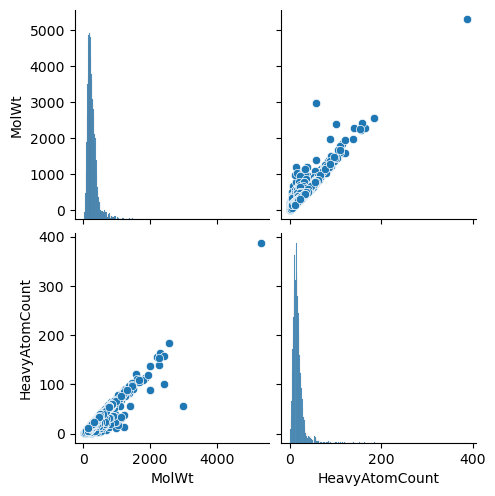

In [5]:
sns.pairplot(data[["MolWt", "HeavyAtomCount"]])

Not surprisingly, we can already see a linear correlation between the number of heavy atoms and the molecular weight. Let's try to find the slope of the best linear fit. For the analytical solution, we will review the important topics from the lecture. 


In a supervised scenario, where the inputs and outputs are known, we want to predict 

Y (aka Response, Targets, Labels) 

with 

X (aka Features, Variables, Predictors)

via finding good 

$\beta$ (aka Coefficients, Weights).

We will notate vectors $\mathbf{x}$ in bold small letters, Matrizes $\mathbf{A}$ in capital bold letters and scalar variables $\beta$ in regular letters.

The prediction of the molecular mass with the number of heavy atoms is a one dimesional linear regression. The formular is simply 
$$
   \mathbf{y} = f(\mathbf{x}) = \beta_0+\beta_1\mathbf{x} 
$$
The vector $\mathbf{y}$ contains all n target values $y_i$ (MolWeight) and the vector $\mathbf{x}$ contains all n features $x_i$ (Nheavyatoms):
$$
   \mathbf{y} = 
   \begin{pmatrix}
   y_1 \\ y_2 \\ \vdots \\ y_n  \\
   \end{pmatrix},
   \mathbf{x} =
   \begin{pmatrix}
   x_1 \\ x_2 \\ \vdots \\ x_n \\
   \end{pmatrix}
$$

 The $\beta_0$ and $\beta_1$ are scalar values that we want to find. 

A common notation adds a "One" as an aditional entry to all Features and summarizes all betas into a vector itself, so one single feature $x_i$ gets to the vector $\mathbf{x_i}=(1, x_i)$ and the one dimensional feature vector $\mathbf{x}$ gets to a matrix $\mathbf{X}$. The betas get to $\mathbf{\beta}=(\beta_0, \beta_1)$ leading to
$$
   \mathbf{y} = f(\mathbf{X}) = \mathbf{X}\mathbf{\beta} 
$$
with 
$$
   \mathbf{X} =
   \begin{pmatrix}
   1  & x_1 \\ 1 & x_2 \\ \vdots & \vdots\\ 1 &  x_n \\
   \end{pmatrix}, 
   \mathbf{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}
$$

This is why you often see $\mathbf{X}$ to represent the inputs, even in the case of a one-dimensional regression, when they are actually a vector $\mathbf{x}$.
Another common notation is to define the betas as weights $\mathbf{w}$. We have one weight $\beta_0=w_0$ which is called the bias or intercept and one additional weight per feature. We can have multiple outputs, too. Then the vector $\mathbf{y}$ gets to the matrix $\mathbf{Y}$.  We will stick to the simpler linear regression with only one output. The general expression for a dataset with n entries and k features is then: 
<!-- 
$$
  (\mathbf{y_1}, \mathbf{y_2},...,\mathbf{y_j})=\mathbf{Y}=f_w(\mathbf{x_1},\mathbf{x_2},...,\mathbf{x_k}) = \mathbf{X}\mathbf{w} = w_{0} \mathbf{1} + w_{1} \mathbf{x_1} + w_{2} \mathbf{x_2}  + ... + w_{k} \mathbf{x_k} 
$$
Note that the vectors $\mathbf{x_k}$ and $\mathbf{y_j}$ all contains n entries, so $\mathbf{x_2}$ is not the second entry, but the second feature vector with n entries itself.. In Matrix notation we write: -->

\begin{equation*}
\begin{pmatrix}
  y_0 \\ y_1 \\ \vdots \\ y_n  \\
\end{pmatrix} =
\mathbf{y} = 
\mathbf{X}\mathbf{w} =
\begin{pmatrix}
  1       & x_{1,1}   & x_{1,2}  & \cdots  & x_{1,k}  \\
  1       & x_{2,1}   & x_{2,2}  & \cdots  & x_{2,k}  \\
  \vdots  & \vdots  & \vdots & \ddots  & \vdots \\
  1       & x_{n,1 }  & x_{n,2}  & \cdots  & x_{n,k}  \\
\end{pmatrix}
\begin{pmatrix}
  w_0 \\ w_1 \\ \vdots \\ w_k 
\end{pmatrix} 

\end{equation*}

From the lecture, we know that the residual sum of squares is given by 

\begin{equation*}
RSS = \sum_i^n (y_{i,true} - y_{i,pred})^2 = ||\mathbf{X} \mathbf{w} - \mathbf{y}||^2 = (\mathbf{X} \mathbf{w} - \mathbf{y})^T(\mathbf{X} \mathbf{w} - \mathbf{y}) = \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w} - \mathbf{y}^T \mathbf{X} \mathbf{w} - \mathbf{w}^T \mathbf{X}^T \mathbf{y} + \mathbf{y}^T \mathbf{y}
\end{equation*}

This is extreme when the derivation with respect to the weights is minimal:

\begin{align*}
\frac{\partial RSS}{\partial \mathbf{w}} = 2 \mathbf{X}^T \mathbf{X} \mathbf{w} - 2 \mathbf{X}^T \mathbf{y} &\overset{!}{=} 0\\
\mathbf{X}^T \mathbf{X} \mathbf{w}  &= \mathbf{X}^T \mathbf{y}\\
\mathbf{w}  &= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{align*}

So we can calculate the optimal weights in an analytical way. 

Let's try this out with ${y} \in R^{9982}$ and ${X} \in R^{2\times9982}$, so $\mathbf{w} \in R^2$:

In [6]:
y: np.ndarray = np.array(data["MolWt"])
x: np.ndarray = np.array(data["HeavyAtomCount"])
print("x.shape original:\n", x.shape, "\nfirst 3 entries:\n", x[:3])
# add an extra dimension to x
x: np.ndarray = np.stack([np.ones_like(x), x], axis=1)
print("\nx.shape after np.stack:\n", x.shape, "\nfirst 3 entries: \n", x[:3])

# Calculate weights with numpy's matrix product np.matmul (shortcut "@") and its inverting function linalg.inv()
print("\ncalculating weights...")
w: np.ndarray = np.linalg.inv((x.T @ x)) @ x.T @ y
print("weights =",w) 

x.shape original:
 (9982,) 
first 3 entries:
 [23. 13.  9.]

x.shape after np.stack:
 (9982, 2) 
first 3 entries: 
 [[ 1. 23.]
 [ 1. 13.]
 [ 1.  9.]]

calculating weights...
weights = [18.234 14.299]


We found an analytical expression: The intercept $w_0$ is 18.2 and the coefficient $w_1$ is 14.3. Let's see how good the fit is: 

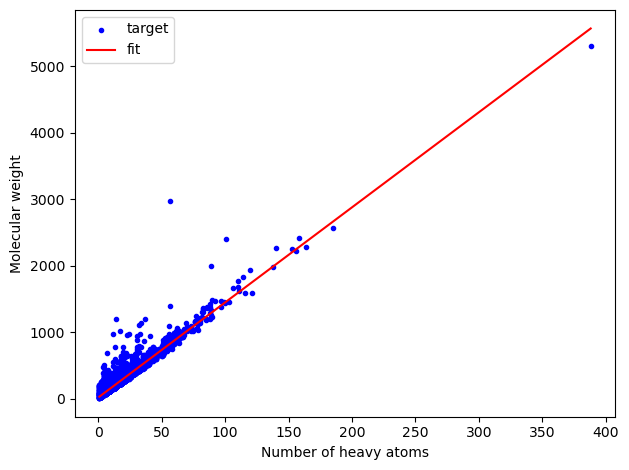

In [7]:
# plot the molecular weight and the linearly transformed number of heavy atoms

# create the figure
fig, ax = plt.subplots() 
# plot blue scatters
ax.scatter(data["HeavyAtomCount"], data["MolWt"], color="blue", marker=".", label="target")
# for the linear fit, create 1000 values between the minimum and maximum number of heavy atoms
x_values = np.linspace(data["HeavyAtomCount"].min(), data["HeavyAtomCount"].max(), 1000)
# plot the linear fit with the weights
ax.plot(x_values, w[0]+x_values*w[1], color="red", label="fit")
# set appearance of axis and create a legend
ax.set_xlabel("Number of heavy atoms")
ax.set_ylabel("Molecular weight")
ax.legend() 
plt.tight_layout() 
# show the plot 
plt.show() 

This looks good. We will talk about quantifying the goodness of a fit later. 

Luckily, the same job can be done with sophisticated packages like scikit learn. It is easy to use and only needs a few steps:

In [8]:
# data parsing
y: np.ndarray = np.array(data["MolWt"])
x: np.ndarray = np.array(data["HeavyAtomCount"]).reshape(-1,1) # reshape makes [1,2,3] to [[1],[2],[3]]. This is often needed for various functions around numpy.
# create a model object (we imported it from sklearn)
regr = LinearRegression()
# the determination of weights is called fitting (or training)
regr.fit(x, y)
# get the weights
print("The weights obtained from scikit-learn are:\n", regr.intercept_, " and ", regr.coef_[0])
print("The weights obtained from numpy are:\n", w[0], " and ", w[1])

The weights obtained from scikit-learn are:
 18.23365140599779  and  14.298529479612466


The results are identical, because scikit-learn does the exact same analytical calculation (Ordinary Least Squares) under the hood. We will see deviations of machine learned coefficients in the next lectures. 

#### Multiple Regression

Let's try the same procedure for a more complicated problem: Can we predict the solubility of a molecule with its molecular weight, its accesssible surface area and its Number of hydrogen-bond-donors and -acceptors? 

In [14]:
# parsing
y_multi: pd.Series = data["Solubility"]
x_multi: pd.DataFrame = data[["MolWt", "LabuteASA", "NumHAcceptors","NumHDonors"]]

Again, let's check whether the data set has any issues (NaN or missing values)...

In [15]:
# check molecular weight entries#
print(data["MolWt"].describe()[0]) # only print the first line which is the count 
print(data["MolWt"].isna().sum())
print(data["LabuteASA"].describe()[0] )
print(data["LabuteASA"].isna().sum())
print(data["NumHAcceptors"].describe()[0] )
print(data["NumHAcceptors"].isna().sum())
print(data["NumHDonors"].describe()[0] )
print(data["NumHDonors"].isna().sum())

9982.0
0
9982.0
0
9982.0
0
9982.0
0


... there are zero NaN values and the value count for all features is 9982. Let's visualize the pairwise linear correlations. Before executing the next cell, which linear correlations do you expect between molecular weight, ASA, H-bond-donors, H-bond-acceptors and solubility?

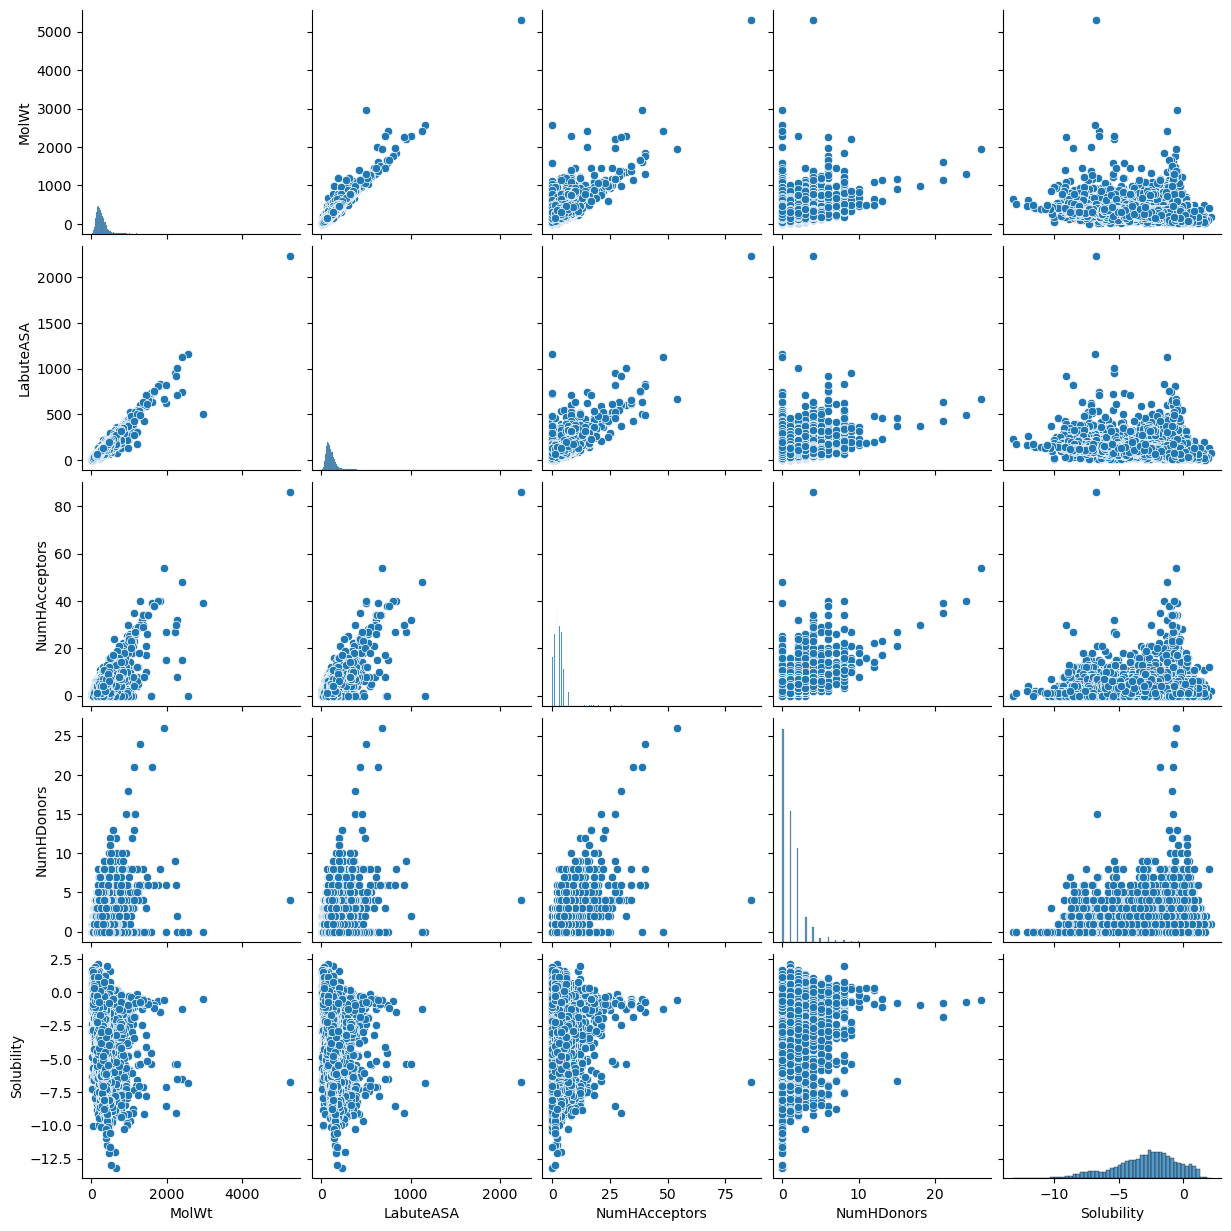

In [20]:
sns.pairplot(data[["MolWt", "LabuteASA", "NumHAcceptors", "NumHDonors", "Solubility"]])
sns.set_context("notebook")
plt.show()

We cannot see any pairwise linear correlation between solubility and the 4 features (last row/column). We will try our best with multiple linear regression:

A very common strategy in ML is to split the data set into train and test sets. This allows evaluating the performance of the model on a test set, that the model has not seen during training. 

In [17]:
# split it into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2)
print("Training features have shape: ", x_train.shape)
print("Testing features have shape: ", x_test.shape)
print("Training targets have shape: ", y_train.shape)
print("Testing targets have shape: ", y_test.shape)

Training features have shape:  (7985, 4)
Testing features have shape:  (1997, 4)
Training targets have shape:  (7985,)
Testing targets have shape:  (1997,)


Train the model for multilinear regression.

In [19]:
multiregr: LinearRegression = LinearRegression()
multiregr.fit(x_train, y_train)
print("The weights obtained from scikit-learn are:\n", multiregr.intercept_, " and ", multiregr.coef_)
print(f"As a reminder: The features used for the fit were: {list(x_multi.columns)}")

The weights obtained from scikit-learn are:
 -1.7133223690806296  and  [-0.008 -0.005  0.378  0.257]
As a reminder: The features used for the fit were: ['MolWt', 'LabuteASA', 'NumHAcceptors', 'NumHDonors']


Note that there are 4 coefficients, one for each feature and still one bias $w_0$. You can relate the coefficients with feature importance, which is not easily possible with many other machine learning methods. A negative coefficient means negative correlation, a positive means positive correlation and zero means no correlation. We can see that the more H-bond-acceptors and -donors, the more soluble the molecule is, whereas the molecular weight and the ASA is not important for the solubility. 

#### Evaluation

We cannot plot 5 dimensions, easily. But because of the test set, we can evaluate the model's performance on data, that the model hasn't seen before.

Common metrics for quantitative predictions are the mean absolute error (MAE), root mean squared error (RMSE) and the coefficient of determination (R2). The R2 score sets the error in relation to just predicting the mean of the data. A value of 0 is equal to always predicting the mean, a value of 1 means perfect correlation without any error.
E.g. via the mean absolute error, the root mean squared error and the coefficient of determination (R2):

$$
\begin{align}
MAE &= \frac{1}{n} \sum_i^n | y_{true} - y_{pred} | \\
RMSE &= \sqrt{\frac{1}{n} \sum_i^n (y_{true} - y_{pred})^2} \\
R_2 &= 1- \frac{\sum_i (y_{true} - y_{pred})^2}{\sum_i (y_{true} - \bar{y})^2}
\end{align}
$$

In [13]:
# get the predictions
predictions: np.ndarray = multiregr.predict(x_test)
# and compare them agains the true values y_test 
print("MAE = ", mean_absolute_error(y_test, predictions))
print("RMSE = ", mean_squared_error(y_test, predictions, squared=False))
print("R2 = ", r2_score(y_test, predictions))

MAE =  1.4763778165256607
RMSE =  1.905392275085123
R2 =  0.3606383736878257


We can also plot a scatter plot with true values versus predicted values. 

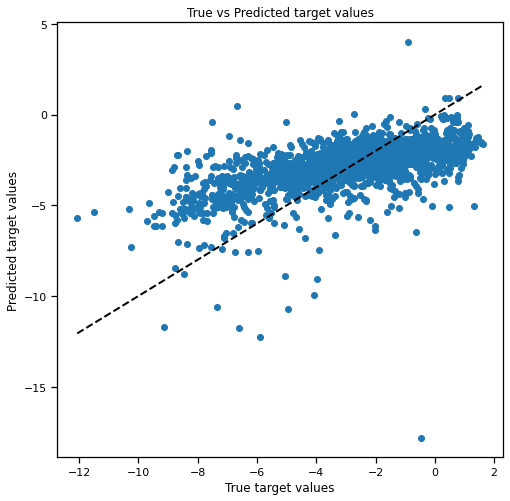

In [14]:
def plot_regression_predictions(y_true: np.ndarray, y_predicted: np.ndarray):
    plt.figure(figsize=(8, 8))
    sns.set_context("notebook")
    plt.scatter(y_true, y_predicted)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("True target values")
    plt.ylabel("Predicted target values")
    plt.title("True vs Predicted target values")
    plt.show()

plot_regression_predictions(y_test, predictions)

Ideally, every point would lie on the diagonal for perfect correlation.

This is far from the diagonal. We will do one more round with more descriptors: H-bond-donors and Number of Heteroatoms and Number of Saturated Rings. All in one cell:

The coefficients are:
 -1.5814599705670145  and  [-0.007  0.008  0.128  0.192 -0.298  0.095 -0.27 ]
MAE =  1.297290924535131
RMSE =  1.716478581135293
R2 =  0.4562113436340819


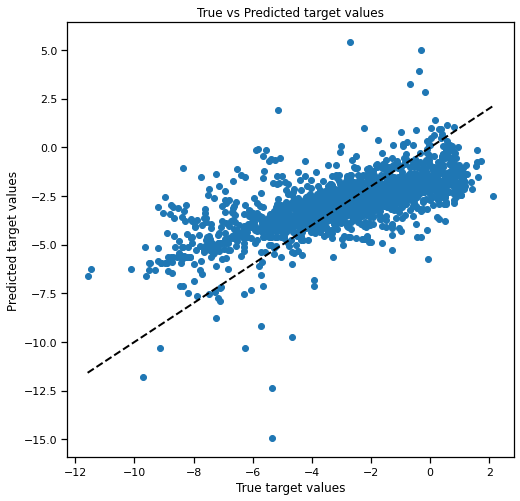

In [15]:
# parsing
y_multi: np.ndarray = np.array(data["Solubility"])
x_multi: np.ndarray = np.array(data[["MolWt", "LabuteASA", "NumHAcceptors","NumHDonors", "RingCount", "NumSaturatedRings","MolLogP"]])
# split it into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2)
# create the model 
multiregr: LinearRegression = LinearRegression()
# fit it 
multiregr.fit(x_train, y_train)
# get the predictions
predictions: np.ndarray = multiregr.predict(x_test)
# print the coefficients 
print("The coefficients are:\n", multiregr.intercept_, " and ", multiregr.coef_)
# evaluate the performance 
print("MAE = ", mean_absolute_error(y_test, predictions))
print("RMSE = ", mean_squared_error(y_test, predictions, squared=False))
print("R2 = ", r2_score(y_test, predictions))
# plot the predictions against the true values 
plot_regression_predictions(y_test, predictions)

The predictions get slightly better, but still not good. We see that solubility is not an easy property to predict. At least linearly with the properties, that we have access to. 